# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import datasets

In [36]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [37]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [38]:
X = boston.data
y = boston.target

# 3. Train test split

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
x_train.shape

(404, 13)

# 4. Simple Linear Model

In [40]:
from sklearn.linear_model import LinearRegression
modellr = LinearRegression()
modellr.fit(x_train,y_train)
modellr.score(x_train,y_train)


0.7581683097197587

In [41]:
modellr.fit(x_test,y_test)
modellr.score(x_test,y_test)

0.6936005727833152

In [42]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)
x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.fit_transform(x_test)


In [43]:
modelp = LinearRegression()
modelp.fit(x_train_poly,y_train)
modelp.score(x_train_poly,y_train)

0.9340182479096925

In [44]:
modelp.fit(x_test_poly,y_test)
modelp.score(x_test_poly,y_test)

0.9996715357963873

# 5. Ridge Regularization for Linear Model

In [45]:
from sklearn.linear_model import Ridge,Lasso
modelr = Ridge(alpha=1)
modelr.fit(x_train_poly,y_train)
modelr.score(x_train_poly,y_train)

0.9352568310952872

In [46]:
modelr.fit(x_test_poly,y_test)
modelr.score(x_test_poly,y_test)

0.9862627440545767

# 6. Lasso Regularization for Linear Model

In [47]:
models = Lasso(alpha=0.00001)
models.fit(x_train_poly,y_train)
models.score(x_train_poly,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.295e+03, tolerance: 3.448e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.9248853886769657

In [48]:
models.fit(x_test_poly,y_test)
models.score(x_test_poly,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+02, tolerance: 8.101e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.9753077890502425

# 7. Polynomial Regression of degree 2

In [49]:
from sklearn.preprocessing import PolynomialFeatures
modelpf = PolynomialFeatures(degree = 2)
x_train_poly = modelpf.fit_transform(x_train)
x_train_poly

array([[1.00000000e+00, 1.50380000e-01, 0.00000000e+00, ...,
        1.37129496e+05, 9.40957710e+03, 6.45668100e+02],
       [1.00000000e+00, 1.06120000e-01, 3.00000000e+01, ...,
        1.55724944e+05, 4.89328800e+03, 1.53760000e+02],
       [1.00000000e+00, 1.42502000e+00, 0.00000000e+00, ...,
        1.32721776e+05, 2.69225090e+03, 5.46121000e+01],
       ...,
       [1.00000000e+00, 3.50200000e-02, 8.00000000e+01, ...,
        1.57529610e+05, 1.32167700e+03, 1.10889000e+01],
       [1.00000000e+00, 3.73800000e-02, 0.00000000e+00, ...,
        1.51632360e+05, 2.62845000e+03, 4.55625000e+01],
       [1.00000000e+00, 2.37934000e+00, 0.00000000e+00, ...,
        2.98978681e+04, 4.80689800e+03, 7.72840000e+02]])

In [50]:
x_test_poly = modelpf.fit_transform(x_test)
x_test_poly

array([[1.00000000e+00, 5.11830000e-01, 0.00000000e+00, ...,
        1.52154605e+05, 1.84503110e+03, 2.23729000e+01],
       [1.00000000e+00, 6.41700000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.84199200e+03, 9.37024000e+01],
       [1.00000000e+00, 2.53870000e-01, 0.00000000e+00, ...,
        1.57529610e+05, 1.22284890e+04, 9.49256100e+02],
       ...,
       [1.00000000e+00, 1.80028000e+00, 0.00000000e+00, ...,
        5.18063121e+04, 2.76318540e+03, 1.47379600e+02],
       [1.00000000e+00, 1.43900000e-02, 6.00000000e+01, ...,
        1.41902890e+05, 1.64994600e+03, 1.91844000e+01],
       [1.00000000e+00, 4.93200000e-02, 3.30000000e+01, ...,
        1.57529610e+05, 2.98865700e+03, 5.67009000e+01]])

In [51]:
modellrpf = LinearRegression()
modellrpf.fit(x_train_poly, y_train)
modellrpf.score(x_train_poly, y_train)

0.9340182479096925

In [52]:
modellrpf.score(x_test_poly, y_test)

0.7079715157340809

# 8. Ridge Regularization for Polynomial model

In [53]:
from sklearn.linear_model import Ridge, Lasso
modelrpf = Ridge(alpha = 0)
modelrpf.fit(x_train_poly, y_train)
modelrpf.score(x_train_poly, y_train)

0.9374405261220626

In [54]:
modelrpf.score(x_test_poly, y_test)

0.7347890116621587

# 9. Lasso Regularization for Polynomial model

In [55]:
modellpf = Lasso(alpha = 0)
modellpf.fit(x_train_poly, y_train)
modellpf.score(x_train_poly, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.295e+03, tolerance: 3.448e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

0.9248936587042536

In [56]:
modellpf.score(x_test_poly, y_test)

0.6662958291949601

# 10. Select K Best

In [57]:
#implementing feature selection using SelectKBest Class
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb = SelectKBest(score_func=f_regression,k=12)
x_selected = kb.fit_transform(X,y)
x_selected.shape

(506, 12)

In [58]:
xtrain,ytrain,xtest,ytest = train_test_split(x_selected, y, random_state = 10)
x_train.shape

(404, 13)

In [59]:
X.shape

(506, 13)

In [60]:
xtrain,xtest,ytrain,ytest = train_test_split(x_selected,y)
xtrain.shape

(379, 12)

In [61]:
lr = LinearRegression()#
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

0.7490263734516025

In [62]:
lr.fit(xtest,ytest)
lr.score(xtest,ytest)

0.7160636307561314


Correlation

In [63]:
df = pd.DataFrame(data=X,columns=boston.feature_names)
df['y'] = y 
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT     y  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [64]:
corr = df.corr() #to get correlation
corr

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
y       -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT         y  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
y        0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

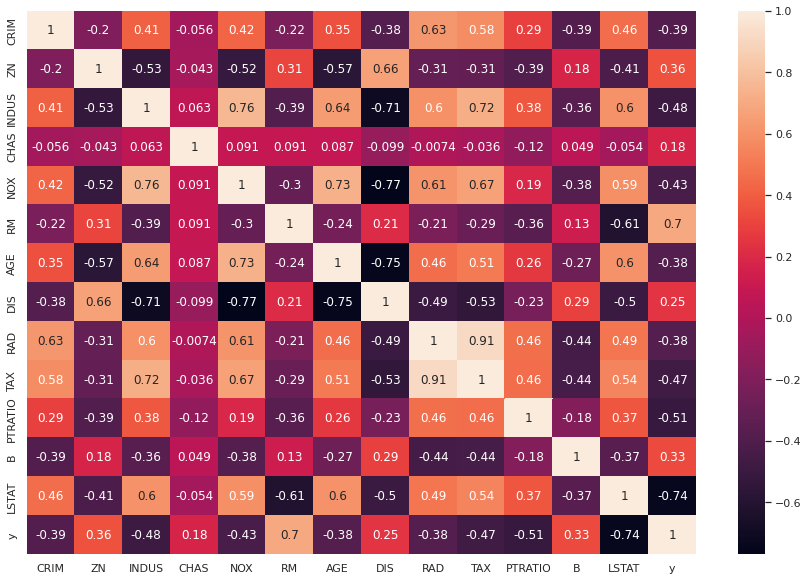

In [65]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data = corr,annot=True)
plt.show()

In [66]:
columns = ['RM','LSTAT','PTRATIO','INDUS','TAX','NOX','CRIM'] #manual feature selection based on high corelation


In [67]:
sdf=df[columns]
sdf.head()

RM  LSTAT  PTRATIO  INDUS    TAX    NOX     CRIM
0  6.575   4.98     15.3   2.31  296.0  0.538  0.00632
1  6.421   9.14     17.8   7.07  242.0  0.469  0.02731
2  7.185   4.03     17.8   7.07  242.0  0.469  0.02729
3  6.998   2.94     18.7   2.18  222.0  0.458  0.03237
4  7.147   5.33     18.7   2.18  222.0  0.458  0.06905

# 11. Conclusion

In [68]:
# Regularization improves the accuracy of the model and it helps to improve overfitting and underfitting model.
# Select K best improves the accuracy of the model by reducing the number of training data.
# Select K best visualize how our training datas are related to each other and it also minimizes overfitting and underfitting model.